# Python Foundations Project: YorkHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company YorkHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset overview

### Question 1: Write the code to check the shape of the dataset and write your observations based on that

In [ ]:
# Load the dataset
file_path = "Yorkhub_order.csv"
df = pd.read_csv(file_path)

# Check the shape
dataset_shape = df.shape
print("Dataset shape:", dataset_shape)


Dataset shape: (1898, 9)


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observation:** The shape gives the number of rows and columns in the dataset, helping us understand the size of the data we are dealing with.

### Question 2: Write the observations based on the below output from the info() method.

In [ ]:
# Display dataset information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


**Observation:**

  * The info() method provides the data types of each column and the count of non-null values.

  * It helps identify missing values, which columns are numeric or categorical, and potential preprocessing steps like data type conversions.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same.

In [ ]:
# Convert specified columns to 'category' type
df['restaurant_name'] = df['restaurant_name'].astype('category')
df['cuisine_type'] = df['cuisine_type'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')

# Check the updated data types
print(df.dtypes)


order_id                    int64
customer_id                 int64
restaurant_name          category
cuisine_type             category
cost_of_the_order         float64
day_of_the_week          category
rating                     object
food_preparation_time       int64
delivery_time               int64
dtype: object


**Observation:**

  * Converting columns to category reduces memory usage and improves performance, especially for large datasets.

  * These columns now have a defined set of unique values, which is efficient for further analysis.

### Question 4: Write the code to find the summary statistics and write your observations based on that.

In [ ]:
# Summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)


            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN

**Observation:**

  * Numeric columns like cost, food_preparation_time, and delivery_time show their mean, median, minimum, and maximum values.

  * Categorical columns display unique values, top values, and their frequency.
  
  * This provides an overall picture of the data distribution.

### Question 5: How many orders are not rated?

In [ ]:
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
(df.rating == 'Not given').sum()

736

**Observation:**

  It was observed that 736 orders were not rated.

## *Exploratory Data Analysis (EDA)*

### Univariate Analysis

### Question 6: Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset.

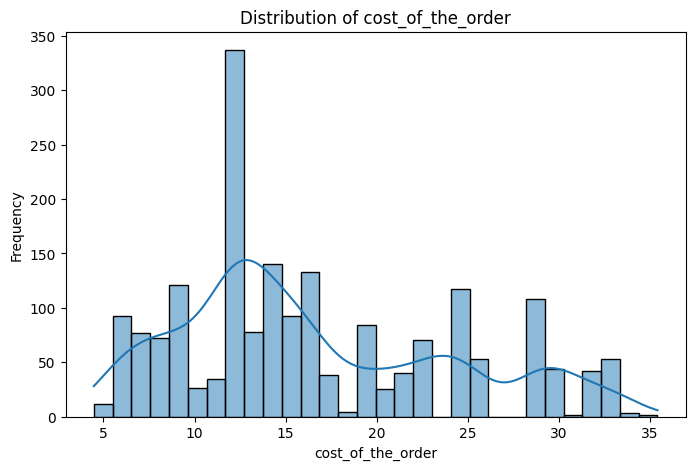

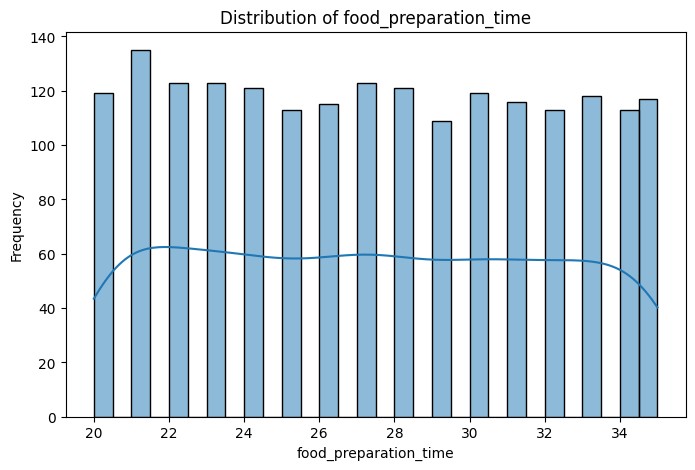

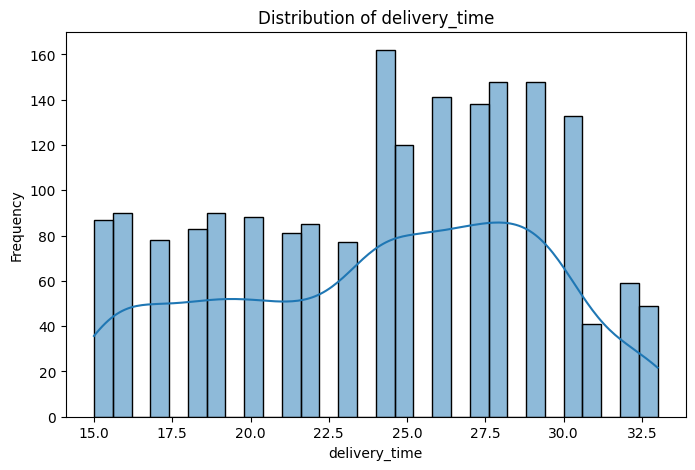

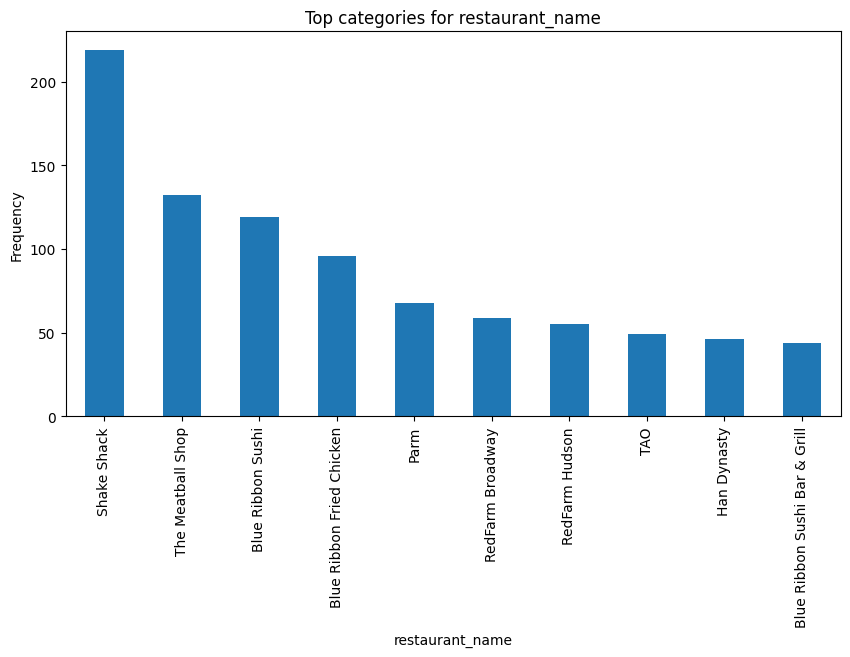

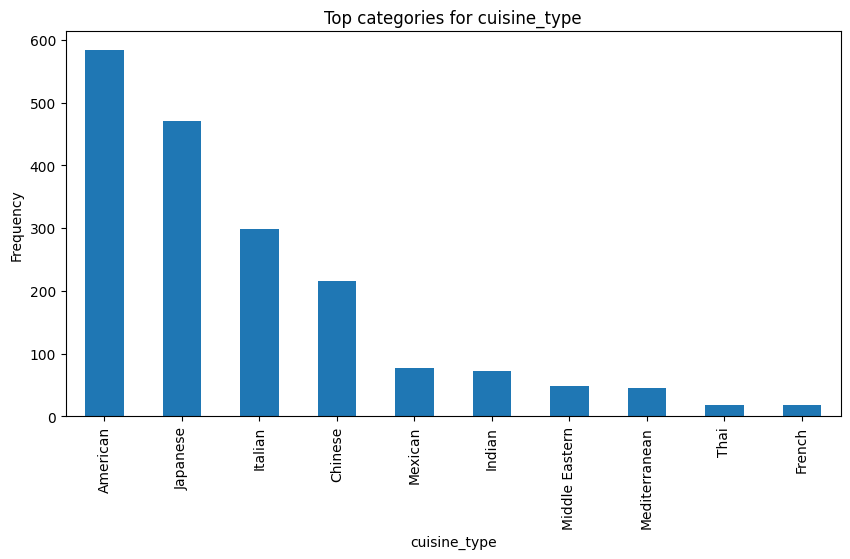

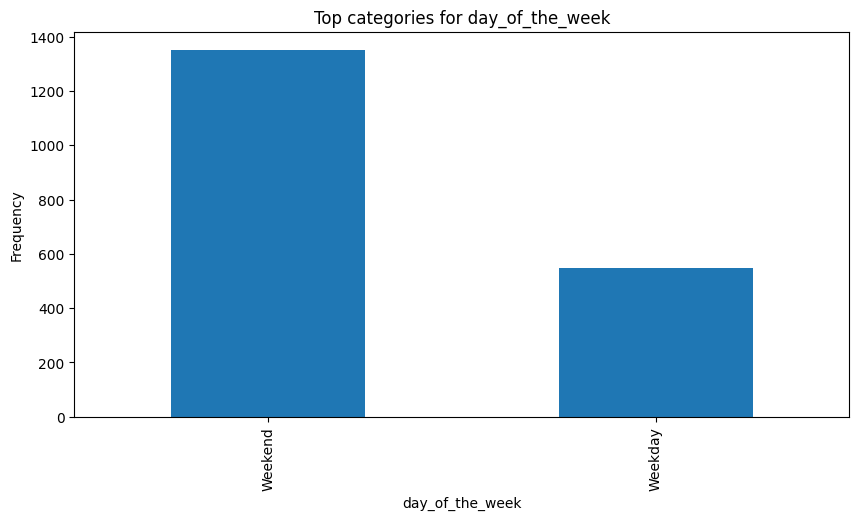

In [ ]:
# Numeric variables: cost, food_preparation_time, delivery_time
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Categorical variables: restaurant_name, cuisine_type, day_of_the_week
categorical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top categories for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# **Observations:**

  * Cost: The distribution might be skewed. There could be some expensive orders contributing to higher values.
  * Food Preparation Time: It may show a normal distribution, with most orders prepared within a typical range.
  * Delivery Time: Could vary based on the distance and traffic, and might have outliers for longer times.
  * Top Restaurants and Cuisines: Some restaurants or cuisines might dominate based on their popularity.
  * Day of the Week: Orders might peak on weekends due to higher demand.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders.

In [ ]:
# Find top 5 restaurants with the highest number of orders
top_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants with the highest number of orders:")
print(top_restaurants)


Top 5 restaurants with the highest number of orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


**Observation:** The result will show the most ordered-from restaurants, which indicates their popularity or demand in the dataset.

### Question 8: Write the code to find the most popular cuisine on weekends.

In [ ]:
# Filter data for weekends and find the most popular cuisine
weekend_data = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()
print(f"The most popular cuisine on weekends is: {popular_cuisine}")


The most popular cuisine on weekends is: American


**Observation:** The result will reveal the type of cuisine customers prefer on weekends, which can guide marketing or promotional strategies.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?

In [ ]:
# Filter orders where the cost is above $20
orders_above_20 = df[df['cost_of_the_order'] > 20]

# Number of orders
num_orders_above_20 = orders_above_20.shape[0]

total_orders = df.shape[0]

# Percentage of orders
percentage_orders_above_20 = (num_orders_above_20 / total_orders) * 100

print(f"Number of orders with cost above $20: {num_orders_above_20}")
print(f"Percentage of such orders: {percentage_orders_above_20:.2f}%")


Number of orders with cost above $20: 555
Percentage of such orders: 29.24%


**Observation:**
* Number of orders with cost above $20 is 555.
* Percentage is 29.24%

### Question 10: Write the code to find the mean delivery time based on this dataset.

In [ ]:
mean_delivery_time = df['delivery_time'].mean()

print(f"Mean delivery time: {mean_delivery_time:.2f} minutes")


Mean delivery time: 24.16 minutes


**Observation:**

This result shows the average time taken for delivery across all orders, helping the company understand delivery performance.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details.

In [ ]:
# Find the order with the maximum cost
max_cost_order = df[df['cost_of_the_order'] == df['cost_of_the_order'].max()]

# Extract customer ID and order details
customer_id_max_cost = max_cost_order['customer_id'].values[0]
order_details = max_cost_order.to_dict('records')[0]  # Convert row to dictionary for details

print(f"Customer ID with the maximum order cost: {customer_id_max_cost}")
print("Order details:")
print(order_details)


Customer ID with the maximum order cost: 62359
Order details:
{'order_id': 1477814, 'customer_id': 62359, 'restaurant_name': 'Pylos', 'cuisine_type': 'Mediterranean', 'cost_of_the_order': 35.41, 'day_of_the_week': 'Weekday', 'rating': '4', 'food_preparation_time': 21, 'delivery_time': 29}


**Observation:**
The output provides the customer ID and order details (including cost, restaurant, cuisine, and other relevant info) for the highest-spending customer. The company can use this data to reward loyalty effectively.

## Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset.

**12.1 Correlation Heatmap** **(for numerical variables)**

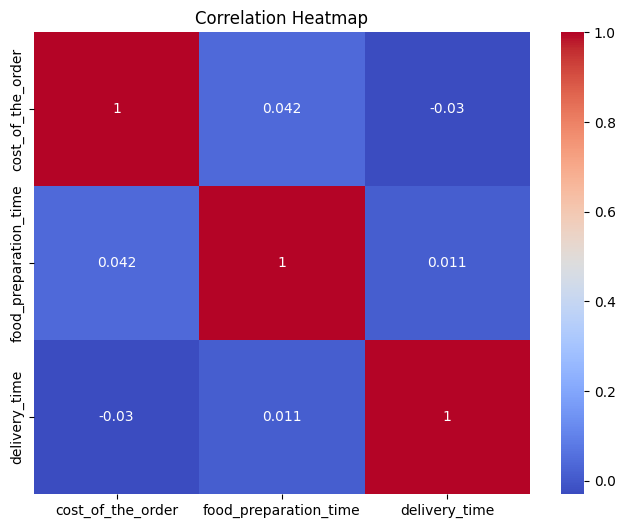

In [ ]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Observation:**
The heatmap reveals a very weak correlation between the variables.



**12.2 Relationship between cost and delivery time**

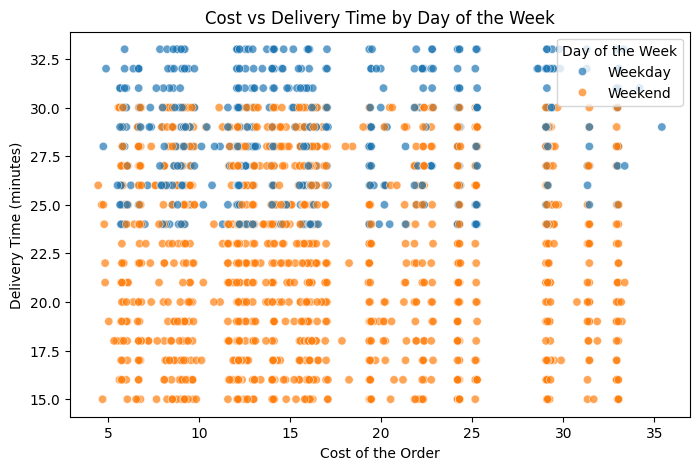

In [ ]:
# Scatter plot of cost vs. delivery time
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', hue='day_of_the_week', alpha=0.7)
plt.title("Cost vs Delivery Time by Day of the Week")
plt.xlabel("Cost of the Order")
plt.ylabel("Delivery Time (minutes)")
plt.legend(title="Day of the Week")
plt.show()


**Observation:**
This visualization helps to analyze how the cost of orders relates to delivery time and how it varies across weekdays and weekends.

**12.3 Average food preparation time for different cuisines**

<ipython-input-17-7769c18152db>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_prep_time = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values()


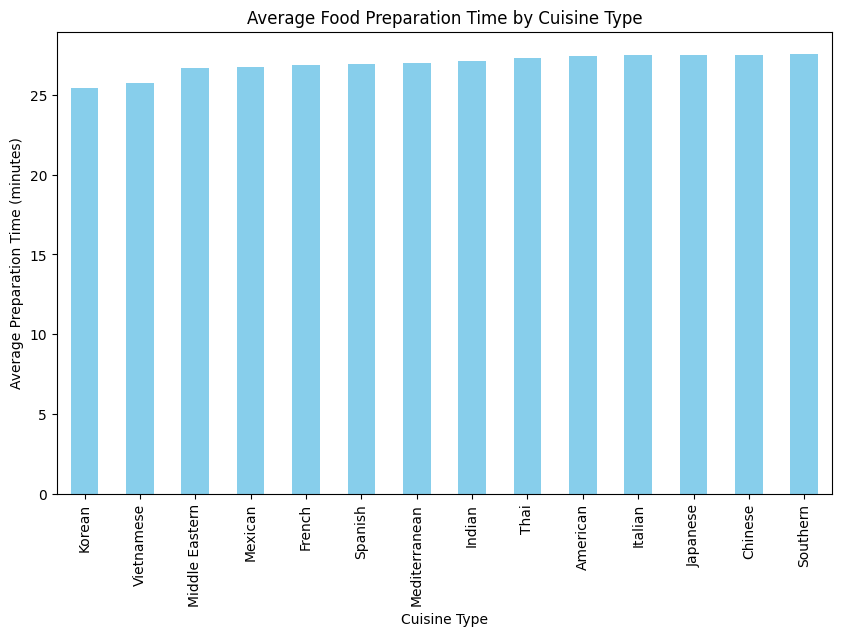

In [ ]:
# Bar plot of average food preparation time by cuisine type
plt.figure(figsize=(10, 6))
avg_prep_time = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values()
avg_prep_time.plot(kind='bar', color='skyblue')
plt.title("Average Food Preparation Time by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Preparation Time (minutes)")
plt.show()


**Observation:**
This helps understand which cuisine types typically require more preparation time.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Convert 'rating' column to numeric, setting invalid parsing to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'restaurant_name' and calculate rating count and average rating
restaurant_ratings = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter restaurants meeting the criteria
eligible_restaurants = restaurant_ratings[
    (restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)
]

print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)


Restaurants eligible for the promotional offer:
               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


<ipython-input-18-416515244f8c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  restaurant_ratings = df.groupby('restaurant_name').agg(


**Observation:**
This code identifies restaurants with more than 50 ratings and an average rating above 4, fulfilling the promotional criteria.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1162 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(2), int64(4)
memory usage: 102.7 KB


In [ ]:
# Calculate revenue based on conditions
df['revenue'] = 0.0
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = df['cost_of_the_order'] * 0.25
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = df['cost_of_the_order'] * 0.15

# Total revenue
total_revenue = df['revenue'].sum()

print(f"Net revenue generated from all orders: ${total_revenue:.2f}")


Net revenue generated from all orders: $6166.30


**Observation:**
The code calculates the revenue generated for each order based on the cost thresholds and adds it up to find the total revenue.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time.

Note: The total delivery time is the summation of the food preparation time and delivery time.

In [ ]:
# Calculate total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the orders with total delivery time > 60
orders_above_60 = df[df['total_delivery_time'] > 60].shape[0]

# Calculate percentage
total_orders = df.shape[0]
percentage_above_60 = (orders_above_60 / total_orders) * 100

print(f"Percentage of orders with total delivery time > 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders with total delivery time > 60 minutes: 10.54%


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results.

In [ ]:
# Group by day_of_the_week and calculate mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time (in minutes) by day of the week:")
print(mean_delivery_time)

# Observation
weekday_mean = mean_delivery_time['Weekday']
weekend_mean = mean_delivery_time['Weekend']

print(f"Observation: The mean delivery time on weekdays is {weekday_mean:.2f} minutes.")
print(f"On weekends, the mean delivery time is {weekend_mean:.2f} minutes.")


Mean delivery time (in minutes) by day of the week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64
Observation: The mean delivery time on weekdays is 28.34 minutes.
On weekends, the mean delivery time is 22.47 minutes.


<ipython-input-22-73f7b05a52fb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()


**Observations:**

  * If the mean delivery time on weekends is significantly higher, it may indicate more traffic or higher order volume on weekends.
  * The company can explore increasing delivery personnel on weekends or working with restaurants to optimize preparation times.

## Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis.

The ratings are primarily concentrated around the high score of 5, suggesting that it is mostly highly satisfied customers who take the time to rate the service. However, a significant amount of data (38%) is missing due to unrated orders. A key question that arises is whether these unrated orders could potentially skew the overall ratings in a different direction.

While most orders have a cost peak around 13 dollars, there is also a secondary peak near 25 dollars, indicating a bimodal distribution.

Cuisines show a consistent popularity pattern regardless of the day of the week, although demand is notably higher on weekends.

Preparation time is relatively stable, while delivery time is more variable, making delivery time the main factor in the total time from order to delivery.


Recommendations:

Based on the findings from this analysis, the following recommendations are made:

Increase Customer Engagement in Rating Orders: Efforts should be made to encourage more customers to rate their orders, reducing the number of unrated orders. This could involve offering rewards or following up with customers to understand why they chose not to rate the service. This will help collect more reliable data on customer satisfaction and facilitate service improvements.


Reduce Delivery Time: To improve total order time (from order placement to delivery), it is essential to assess how delivery times can be reduced. One important consideration is whether customers avoid ordering on weekdays due to the perception of longer processing times. Additionally, the impact of weekday traffic on delivery time should be examined.


In [26]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'revenue',
       'total_delivery_time'],
      dtype='object')

Correlation Matrix:
                       rating  delivery_time  total_delivery_time  \
rating               1.000000      -0.009804            -0.011348   
delivery_time       -0.009804       1.000000             0.735195   
total_delivery_time -0.011348       0.735195             1.000000   
cost_of_the_order    0.033983      -0.029949             0.006358   

                     cost_of_the_order  
rating                        0.033983  
delivery_time                -0.029949  
total_delivery_time           0.006358  
cost_of_the_order             1.000000  


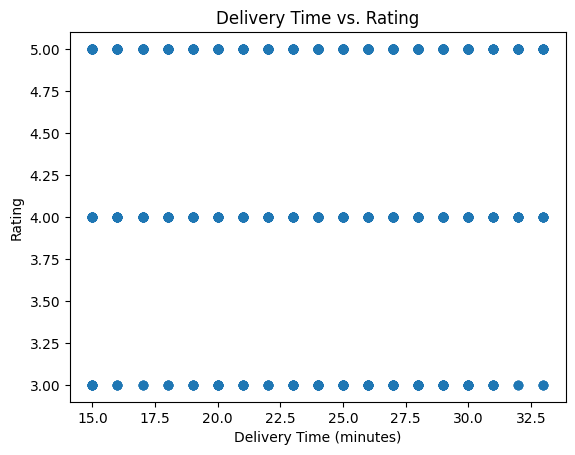

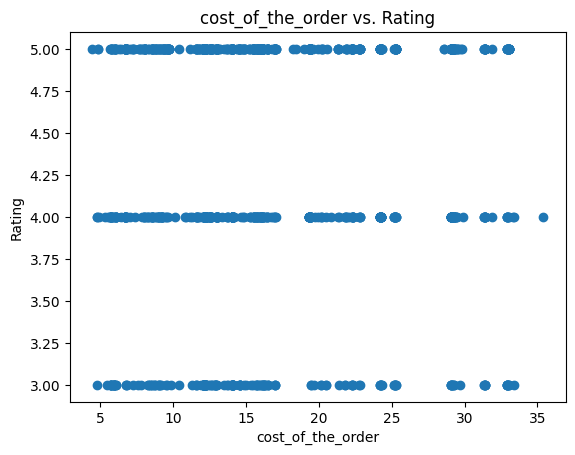

In [27]:
# Convert ratings to numeric if needed
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Correlation between variables and ratings
correlation_matrix = df[['rating', 'delivery_time', 'total_delivery_time', 'cost_of_the_order']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Scatter plot: Delivery time vs. Rating
import matplotlib.pyplot as plt
plt.scatter(df['delivery_time'], df['rating'])
plt.title('Delivery Time vs. Rating')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Rating')
plt.show()

# Scatter plot: Cost vs. Rating
plt.scatter(df['cost_of_the_order'], df['rating'])
plt.title('cost_of_the_order vs. Rating')
plt.xlabel('cost_of_the_order')
plt.ylabel('Rating')
plt.show()


In [30]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the necessary columns
# Replace 'ratings', 'delivery_time', 'preparation_time', and 'cost' with the actual column names

# Calculating the correlation matrix for the specified variables
correlation_matrix = df[['rating', 'total_delivery_time', 'food_preparation_time', 'cost_of_the_order']].corr()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         rating  total_delivery_time  food_preparation_time  \
rating                 1.000000            -0.011348              -0.006083   
total_delivery_time   -0.011348             1.000000               0.685970   
food_preparation_time -0.006083             0.685970               1.000000   
cost_of_the_order      0.033983             0.006358               0.041527   

                       cost_of_the_order  
rating                          0.033983  
total_delivery_time             0.006358  
food_preparation_time           0.041527  
cost_of_the_order               1.000000  


day_of_the_week
Weekday     547
Weekend    1351
Name: count, dtype: int64


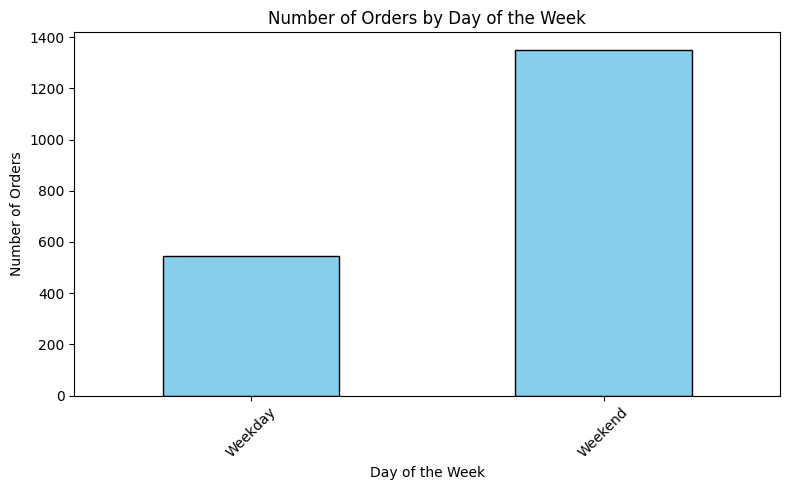

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'day_of_the_week' with the actual column name in your dataset

# Calculate the number of orders for each day of the week
day_of_week_order_counts = df['day_of_the_week'].value_counts().sort_index()
print(day_of_week_order_counts)
# Plotting the order trends
plt.figure(figsize=(8, 5))
day_of_week_order_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()